In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/scrapped-lyrics-from-6-genres/artists-data.csv
/kaggle/input/scrapped-lyrics-from-6-genres/lyrics-data.csv


In [2]:
lyrics_data = pd.read_csv('/kaggle/input/scrapped-lyrics-from-6-genres/lyrics-data.csv')
lyrics_data.rename(columns={"ALink": "Link"}, inplace=True)

In [3]:
artist_data = pd.read_csv('/kaggle/input/scrapped-lyrics-from-6-genres/artists-data.csv')
merged_dfs = lyrics_data.merge(artist_data, how='inner', on='Link')
merged_dfs.head()

,Link,SName,SLink,Lyric,Idiom,Artist,Songs,Popularity,Genre,Genres
0,/10000-maniacs/,More Than This,/10000-maniacs/more-than-this.html,I could feel at the time. There was no way of ...,ENGLISH,10000 Maniacs,110,0.3,Rock,Rock; Pop; Electronica; Dance; J-Pop/J-Rock; G...
1,/10000-maniacs/,More Than This,/10000-maniacs/more-than-this.html,I could feel at the time. There was no way of ...,ENGLISH,10000 Maniacs,110,0.3,Pop,Rock; Pop; Electronica; Dance; J-Pop/J-Rock; G...
2,/10000-maniacs/,Because The Night,/10000-maniacs/because-the-night.html,"Take me now, baby, here as I am. Hold me close...",ENGLISH,10000 Maniacs,110,0.3,Rock,Rock; Pop; Electronica; Dance; J-Pop/J-Rock; G...
3,/10000-maniacs/,Because The Night,/10000-maniacs/because-the-night.html,"Take me now, baby, here as I am. Hold me close...",ENGLISH,10000 Maniacs,110,0.3,Pop,Rock; Pop; Electronica; Dance; J-Pop/J-Rock; G...
4,/10000-maniacs/,These Are Days,/10000-maniacs/these-are-days.html,These are. These are days you'll remember. Nev...,ENGLISH,10000 Maniacs,110,0.3,Rock,Rock; Pop; Electronica; Dance; J-Pop/J-Rock; G...


In [4]:
eng_artists = merged_dfs.loc[merged_dfs['Idiom'] == 'ENGLISH', ['Artist', 'SName', 'Lyric', 'Genre']].drop_duplicates(subset=['SName'])
eng_artists.reset_index(inplace=True, drop=True)
eng_artists.head()

,Artist,SName,Lyric,Genre
0,10000 Maniacs,More Than This,I could feel at the time. There was no way of ...,Rock
1,10000 Maniacs,Because The Night,"Take me now, baby, here as I am. Hold me close...",Rock
2,10000 Maniacs,These Are Days,These are. These are days you'll remember. Nev...,Rock
3,10000 Maniacs,A Campfire Song,"A lie to say, ""O my mountain has coal veins an...",Rock
4,10000 Maniacs,Everyday Is Like Sunday,Trudging slowly over wet sand. Back to the ben...,Rock


In [5]:
drake = eng_artists.loc[eng_artists['Artist'] == 'Drake'].reset_index(drop=True)
drake.head()

,Artist,SName,Lyric,Genre
0,Drake,In My Feelings,"Trap, TrapMoneyBenny. This shit got me in my f...",Hip Hop
1,Drake,God's Plan,Yeah they wishin' and wishin' and wishin' and ...,Hip Hop
2,Drake,Hotline Bling,"You used to call me on my, you used to, you us...",Hip Hop
3,Drake,One Dance,[Intro: Kyla Wizkid]. Baby I like your style. ...,Hip Hop
4,Drake,Legend,(Refrão). When I pull up on a nigga. Tell that...,Hip Hop


In [6]:
drake_line = drake.loc[0, 'Lyric'][:198]
drake_line

"Trap, TrapMoneyBenny. This shit got me in my feelings. Gotta be real with it, yup. Kiki, do you love me? Are you riding?. Say you'll never ever leave from beside me. 'Cause I want ya, and I need ya."

In [7]:
drake_lyrics = drake['Lyric']
type(drake_lyrics)

pandas.core.series.Series

In [8]:
from fastai.text.all import *

In [9]:
spacy = WordTokenizer()
tkn = Tokenizer(spacy)
drake_tokens = drake_lyrics.map(tkn)

print(drake_tokens[0][:10])

['xxbos', 'xxmaj', 'trap', ',', 'trapmoneybenny', '.', 'xxmaj', 'this', 'shit', 'got']


In [10]:
num = Numericalize()
num.setup(drake_tokens)
num.vocab[:50]

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxrep',
 'xxwrep',
 'xxup',
 'xxmaj',
 '.',
 'i',
 ',',
 'you',
 'the',
 'it',
 'to',
 'a',
 'and',
 'me',
 'that',
 "'",
 'my',
 "'m",
 "n't",
 "'s",
 'on',
 'in',
 'do',
 'like',
 'for',
 'got',
 'know',
 'all',
 'we',
 'just',
 'they',
 'with',
 'up',
 '?',
 'of',
 'your',
 'but',
 '[',
 ']',
 'get',
 'no',
 'this',
 'is',
 'yeah',
 '-']

In [11]:
nums = num(tkn(drake_line))[:20]
nums

TensorText([   2,    8,  728,   11, 2178,    9,    8,   46,   57,   30,   18,   26,
          21,  552,    9,    8,   30,  108,   50,  130])

In [12]:
" ".join(num.vocab[o] for o in nums)

'xxbos xxmaj trap , trapmoneybenny . xxmaj this shit got me in my feelings . xxmaj got ta be real'

In [13]:
drake_numericalized = drake_tokens.map(num)
drake_dl = LMDataLoader(drake_numericalized)

x, y = first(drake_dl)
x.shape, y.shape, type(drake_dl)

(torch.Size([64, 72]), torch.Size([64, 72]), fastai.text.data.LMDataLoader)

In [14]:
" ".join(num.vocab[i] for i in x[0])

"xxbos xxmaj trap , trapmoneybenny . xxmaj this shit got me in my feelings . xxmaj got ta be real with it , yup . xxmaj xxunk , do you love me ? xxmaj are you riding ? . xxmaj say you 'll never ever leave from beside me . 'cause i want ya , and i need ya . xxmaj and xxmaj i 'm down for you always . xxup xxunk"

In [15]:
" ".join(num.vocab[i] for i in y[0])

"xxmaj trap , trapmoneybenny . xxmaj this shit got me in my feelings . xxmaj got ta be real with it , yup . xxmaj xxunk , do you love me ? xxmaj are you riding ? . xxmaj say you 'll never ever leave from beside me . 'cause i want ya , and i need ya . xxmaj and xxmaj i 'm down for you always . xxup xxunk ,"

In [16]:
drake_block = DataBlock(
    blocks=TextBlock.from_df('drake', seq_len=72, is_lm=True),
    get_items=ColReader('Lyric')
)
drake_block

In [17]:
path = Path()
path

Path('.')

In [18]:
dls_lm = drake_block.dataloaders(drake, bs=128, seq_len=80)
dls_lm.show_batch(max_n=2)

,text,text_
0,"xxbos xxmaj yeah , oh you got ta love it . xxmaj oh you got , oh you got ta love it . i heard what xxunk , let 's get to the bottom of it . i told xxunk send me something and i got it xxunk . xxmaj somehow always rise xxunk it . xxmaj why you think i got my head in the clouds on my last album cover ? . xxmaj the game is all mine","xxmaj yeah , oh you got ta love it . xxmaj oh you got , oh you got ta love it . i heard what xxunk , let 's get to the bottom of it . i told xxunk send me something and i got it xxunk . xxmaj somehow always rise xxunk it . xxmaj why you think i got my head in the clouds on my last album cover ? . xxmaj the game is all mine and"
1,"the double with cheese . xxmaj special order for anybody that 's comin ' for me . xxmaj shit you probably xxunk if somebody xxunk . xxmaj you see they got me back like it 's just 40 , xxmaj oli , and me . xxmaj cuttin ' all loose ends , i be the xxunk for free . xxmaj i 'm almost at four xxunk going off on the beat . xxmaj feel like xxmaj i 'm in the","double with cheese . xxmaj special order for anybody that 's comin ' for me . xxmaj shit you probably xxunk if somebody xxunk . xxmaj you see they got me back like it 's just 40 , xxmaj oli , and me . xxmaj cuttin ' all loose ends , i be the xxunk for free . xxmaj i 'm almost at four xxunk going off on the beat . xxmaj feel like xxmaj i 'm in the xxmaj"


## DLS are ready
- Create a drake model

In [39]:
learn = language_model_learner(dls_lm, AWD_LSTM, drop_mult=0.3, metrics=accuracy)
learn.loss_func

FlattenedLoss of CrossEntropyLoss()

SuggestedLRs(lr_min=0.05248074531555176, lr_steep=0.14454397559165955)

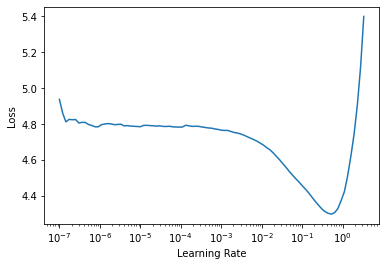

In [35]:
learn.lr_find()

In [40]:
# fit the model frozenfor one epoch using found lr
learn.fit_one_cycle(1, 0.05)

epoch,train_loss,valid_loss,accuracy,time
0,4.079505,3.638409,0.317217,00:14


In [ ]:
# consider saving the model here

In [41]:
# fit the new layer for a few more epochs on same lr
learn.fit_one_cycle(4, 0.005)

epoch,train_loss,valid_loss,accuracy,time
0,3.454239,3.578953,0.322451,00:14
1,3.406861,3.540910,0.323984,00:14
2,3.355263,3.521087,0.326173,00:14
3,3.318860,3.517366,0.326592,00:14


SuggestedLRs(lr_min=0.001096478197723627, lr_steep=2.75422871709452e-06)

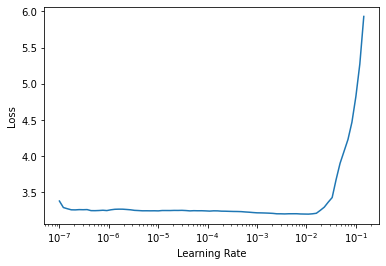

In [42]:
# unfreeze the model and 
learn.unfreeze()
learn.lr_find()

In [43]:
1e-3

0.001

In [44]:
# train for 20 more epochs on the new lr
learn.fit_one_cycle(20, lr_max=slice(1e-5, 1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,3.255697,3.515393,0.326959,00:15
1,3.256489,3.510617,0.327612,00:15
2,3.241075,3.500900,0.329122,00:14
3,3.223158,3.488330,0.331775,00:16
4,3.196661,3.475604,0.333453,00:15
5,3.169229,3.464943,0.336324,00:15
6,3.137609,3.452734,0.339096,00:15
7,3.107830,3.446695,0.340535,00:16
8,3.074810,3.441044,0.342942,00:16
9,3.050558,3.436277,0.344540,00:15


In [51]:
# save the model now
learn.save('drake_model')

Path('models/drake_model.pth')

## Generate Predictions
- Using the trained model, generate song lyrics drake-esque

In [ ]:
start_text = "I walked in the crib"
words = 100
sentences = 3
preds = [learn.predict(start_text, words, temperature=0.75)
         for sentence in range(sentences)]

In [50]:
print("\n".join(preds))

i walked in the crib with the children , . They came back to life . They told me . They deserve it . They got ta get it . We should get it , . You got ta let it go . We all just do n't have to do it anymore . I 'm just getting rid of these . They see the way to the point . But we 're going home . All we do is just go to sleep . You do n't need to sleep in the
i walked in the crib and was stuck in the crib . It was the first time i ever came to sleep . i was so focused on my work on my favorite New York City B Girls . I 'm just glad to see my sister in bed . i got a girl girl i got a girl and i had to get a plastic bag . And i got ta come through the door and put my jersey on my passport . But the girl that that got me married and gave it to
i walked in the crib for the first time . I 've been through my crib for three hours . It 's a way to take it in , . I deserve the night dash , i go , my way , i got ta ride right . Yea , my way up , i do n't need no one . I 'm not happy to ride for

##### 